In [12]:
from pathlib import Path

import torch
from PIL import Image
from torchlake.common.models import VGGFeatureExtractor
from torchlake.common.utils.convert import img_tensor_to_np
from torchlake.common.utils.image import save_img_array
from torchlake.common.utils.plot import plot_grids
from torchlake.style_transfer.models import NeuralStyleTransfer
from torchlake.style_transfer.models.neural_style_transfer.loss import \
    NeuralStyleTransferLoss
from torchlake.style_transfer.utils.train import run_neural_style_transfer
from torchvision.transforms import v2

# setting

In [13]:
content_path = Path("../../data/contents")
style_path = Path("../../data/styles")
artifacts_path = Path("../../artifacts/neural-style-transfer")

In [14]:
device = torch.device('cuda:0')

In [15]:
CONTENT_LAYER_NAMES = ['3_1']
STYLE_LAYER_NAMES = ['1_1', '2_1', '3_1', '4_1', '5_1']

# data

In [16]:
transform = v2.Compose([
  v2.Resize((512, 512)),
  v2.ToImage(),
  v2.ToDtype(torch.float32, scale=True),
])

In [17]:
content = Image.open(content_path.joinpath('101.jpg'))
content = transform(content).unsqueeze(0).to(device)

style = Image.open(style_path.joinpath('starry.jpg'))
style = transform(style).unsqueeze(0).to(device)

# model

In [18]:
feature_extractor = VGGFeatureExtractor("vgg19", "relu", trainable=False).to(device)

In [19]:
model = NeuralStyleTransfer(feature_extractor, CONTENT_LAYER_NAMES, STYLE_LAYER_NAMES)

# train

In [20]:
CONTENT_WEIGHT = 1
STYLE_WEIGHT = 1e6

In [21]:
criterion = NeuralStyleTransferLoss(2, CONTENT_WEIGHT, STYLE_WEIGHT)

In [22]:
output = run_neural_style_transfer(model, criterion, content, style)

run 50:
Total Loss: 13.757572 Content Loss: 7.340245 Style Loss : 0.000006

run 100:
Total Loss: 10.430882 Content Loss: 6.872846 Style Loss : 0.000004

run 150:
Total Loss: 9.039061 Content Loss: 6.824842 Style Loss : 0.000002

run 200:
Total Loss: 8.789582 Content Loss: 7.106236 Style Loss : 0.000002

run 250:
Total Loss: 8.117862 Content Loss: 6.700519 Style Loss : 0.000001

run 300:
Total Loss: 7.591173 Content Loss: 6.371070 Style Loss : 0.000001



In [23]:
# 224 -> 24s
# 512 -> 1m37s~4.5m
# 768 -> 14m

# visualize

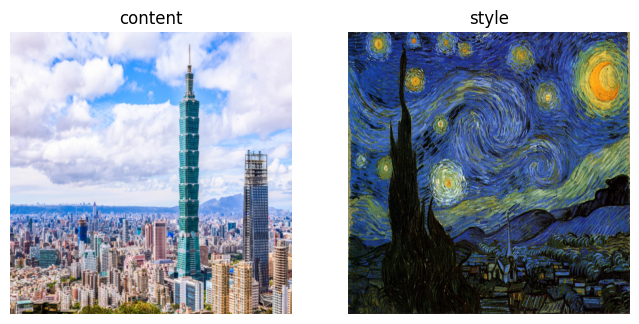

In [24]:
plot_grids(
    [img_tensor_to_np(content), img_tensor_to_np(style)],
    ["content", "style"],
    1,
    2,
)

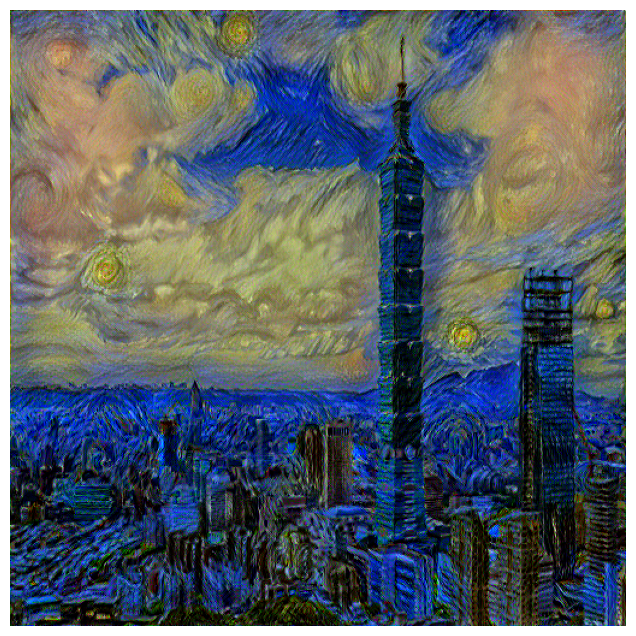

In [25]:
plot_grids([img_tensor_to_np(output)])

In [26]:
output_path = artifacts_path.joinpath('output.png')

In [28]:
save_img_array(img_tensor_to_np(output)[:, :, ::-1], output_path.as_posix())